# Fake News Detection Using the LIAR Dataset
### **CU6051NI - Artificial Intelligence Module**
**Student ID:** 22085776  
**Institution:** Islington College  
**Supervisor:** [Your Supervisor's Name]  
**Date:** [Insert Date]

---

## **Objective**
This notebook implements a fake news detection system using the LIAR dataset. The project involves:
- Data loading and preprocessing
- Exploratory Data Analysis (EDA)
- Feature extraction using TF-IDF
- Implementation of machine learning algorithms (Logistic Regression, Random Forest, Support Vector Machines)
- Model evaluation and comparison using performance metrics

---

## **Problem Statement**
Fake news has emerged as a significant societal challenge, undermining public trust and distorting democratic processes. With the rapid spread of misinformation, there is an urgent need for automated solutions to classify and mitigate fake news effectively.

---

## **Project Goals**
1. **Develop a robust fake news detection system** capable of classifying statements into six distinct truth labels.
2. **Evaluate multiple machine learning models** to determine the most effective approach.
3. **Analyze and visualize performance metrics** for insight into model behavior and limitations.

---

## **Dataset Overview**
The project uses the **LIAR dataset**, a benchmark dataset for fake news detection. It contains over 12,000 manually labeled short statements categorized into:
- Pants-on-Fire
- False
- Barely-True
- Half-True
- Mostly-True
- True

### **Dataset Features**
| **Feature**              | **Description**                                   |
|---------------------------|-------------------------------------------------|
| `id`                     | Unique identifier for each statement             |
| `label`                  | Truthfulness category (e.g., True, False)        |
| `statement`              | Content of the news statement                    |
| `subject`                | Main topic of the statement                      |
| `speaker`                | Name of the person making the statement          |
| `speaker_job_title`      | Job title of the speaker                         |
| `state_info`             | State information                                |
| `party_affiliation`      | Party affiliation of the speaker                 |
| `barely_true_counts`     | Count of barely true statements by the speaker   |
| `false_counts`           | Count of false statements by the speaker         |
| `half_true_counts`       | Count of half true statements by the speaker     |
| `mostly_true_counts`     | Count of mostly true statements by the speaker   |
| `pants_on_fire_counts`   | Count of pants on fire statements by the speaker |
| `context`                | Venue/location of the statement                  |

---

## **Steps in This Notebook**
1. **Data Loading and Inspection**
   - Load the LIAR dataset and inspect its structure.
   - Check for missing values and imbalances in the data.

2. **Exploratory Data Analysis (EDA)**
   - **Import Required Libraries**: Import necessary libraries for analysis.
   - **Load the Dataset**: Load the dataset into a pandas DataFrame.
   - **Data Overview**: Get a quick overview of the dataset, including the first few rows, data types, and basic statistics.
   - **Missing Values Analysis**: Check for any missing values in the dataset and handle them appropriately.
   - **Class Distribution**: Visualize the distribution of the target classes to understand the balance of the dataset.
   - **Text Length Analysis**: Analyze the length of the text data to understand the distribution of text lengths.
   - **Common Words Analysis**: Identify and visualize the most common words in the dataset.
   - **N-grams Analysis**: Analyze the most common n-grams (bigrams, trigrams) in the dataset.

3. **Data Preprocessing**
   - Clean and normalize the text data.
   - Implement a text preprocessing pipeline (tokenization, stopword removal, lemmatization).
   - Apply TF-IDF vectorization for feature extraction.

4. **Model Implementation**
   - Train Logistic Regression, Random Forest, and SVM models.
   - Perform hyperparameter tuning.

5. **Model Evaluation**
   - Use metrics like accuracy, precision, recall, F1-score, and confusion matrix for evaluation.
   - Visualize results and compare model performance.

6. **Conclusion**
   - Summarize findings and discuss potential improvements.

---

## **Development Environment**
- **Programming Language:** Python 3.x
- **IDE/Tools:** Jupyter Notebook, VS Code
- **Libraries:** Pandas, NumPy, Scikit-learn, Matplotlib, Seaborn, NLTK, SpaCy

---

## **Acknowledgments**
This project was developed as part of the Artificial Intelligence module (CU6051NI) under the guidance of [Your Supervisor's Name]. The LIAR dataset was sourced from William Yang Wang's benchmark dataset for fake news detection.

---

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from tabulate import tabulate
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

# Set the style and palette
sns.set(style="darkgrid", font="monospace")
palette = sns.color_palette("viridis")


from scipy.sparse import hstack, csr_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tabulate import tabulate
import time

[nltk_data] Downloading package punkt to /home/sire/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/sire/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/sire/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Loading and Inspecting the Dataset**

In [2]:
# Load the data
df = pd.read_csv("liar_dataset/liars_dataset.csv")

---

## **Exploratory Data Analysis (EDA)**
In this section, we will perform an exploratory data analysis to understand the structure and characteristics of the LIAR dataset. This includes visualizing the distribution of truth labels, analyzing the text data, and identifying common patterns and trends.

### **Steps in EDA**
1. **Data Overview**: Get a quick overview of the dataset, including the first few rows, data types, and basic statistics.
2. **Class Distribution**: Visualize the distribution of the target classes to understand the balance of the dataset.
3. **Text Length Analysis**: Analyze the length of the text data to understand the distribution of text lengths.
4. **Common Words Analysis**: Identify and visualize the most common words in the dataset.
5. **N-grams Analysis**: Analyze the most common n-grams (bigrams, trigrams) in the dataset.
6. **Missing Values Analysis**: Check for any missing values in the dataset.

In [3]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,id,label,statement,subject,speaker,speaker_job,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [4]:
# Display data types and basic statistics
print("\nData types and basic statistics:")
print(tabulate(df.describe(include="all").transpose(), headers="keys", tablefmt="psql"))


Data types and basic statistics:
+----------------------+---------+----------+----------------------------------------------------------------+--------+-----------+----------+-------+-------+-------+-------+-------+
|                      |   count |   unique | top                                                            |   freq |      mean |      std |   min |   25% |   50% |   75% |   max |
|----------------------+---------+----------+----------------------------------------------------------------+--------+-----------+----------+-------+-------+-------+-------+-------|
| id                   |   12791 |    12791 | 6743.json                                                      |      1 | nan       | nan      |   nan |   nan |   nan |   nan |   nan |
| label                |   12791 |        6 | half-true                                                      |   2627 | nan       | nan      |   nan |   nan |   nan |   nan |   nan |
| statement            |   12791 |    12765 | On ch

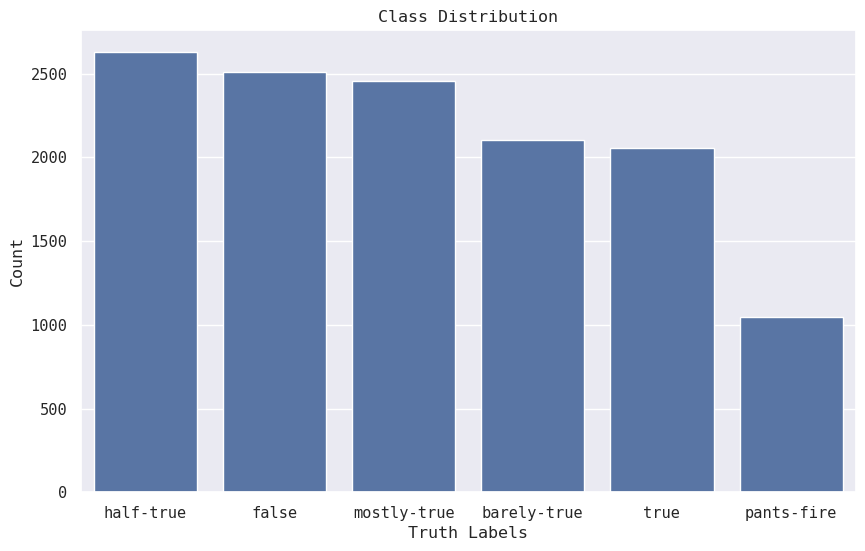

In [5]:
# Class Distribution
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of the target classes
plt.figure(figsize=(10, 6))
sns.countplot(x="label", data=df, order=df["label"].value_counts().index)
plt.title("Class Distribution")
plt.xlabel("Truth Labels")
plt.ylabel("Count")
plt.show()

[nltk_data] Downloading package stopwords to /home/sire/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


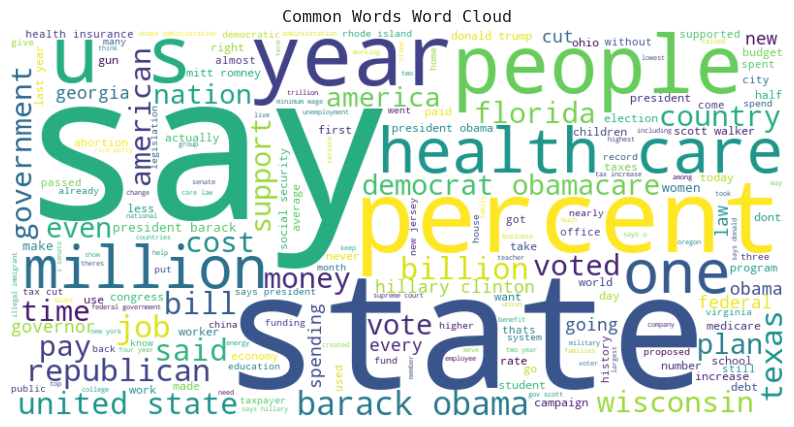

In [6]:
# Common Words Analysis
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))


# Function to preprocess text and remove stopwords
def preprocess_text(text):
    words = text.split()
    words = [word.lower() for word in words if word.lower() not in stop_words]
    return " ".join(words)


# Apply preprocessing to the statements
df["cleaned_statement"] = df["statement"].apply(preprocess_text)

# Generate word cloud
all_words = " ".join([text for text in df["cleaned_statement"]])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(
    all_words
)

# Visualize the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Common Words Word Cloud")
plt.axis("off")
plt.show()

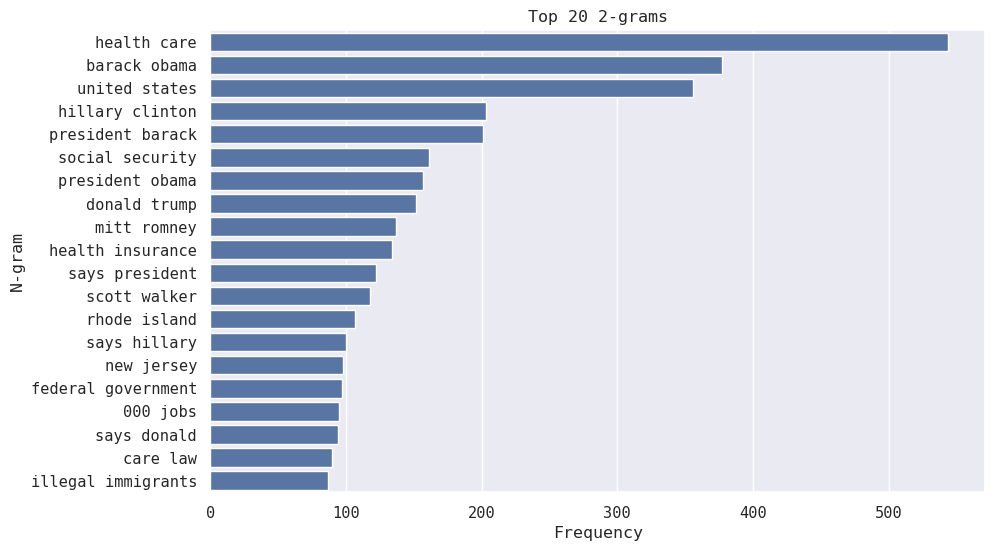

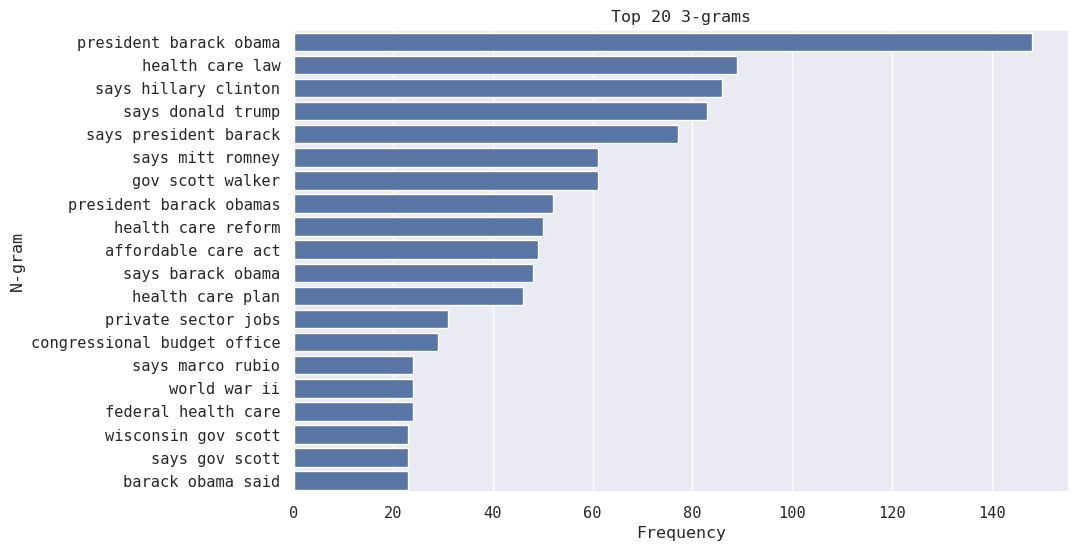

In [7]:
# N-grams Analysis
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt


# Function to plot n-grams
def plot_ngrams(text_data, ngram_range=(2, 2), num=20):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words="english")
    ngrams = vectorizer.fit_transform(text_data)
    ngrams_sum = ngrams.sum(axis=0)
    ngrams_freq = [
        (word, ngrams_sum[0, idx]) for word, idx in vectorizer.vocabulary_.items()
    ]
    ngrams_freq = sorted(ngrams_freq, key=lambda x: x[1], reverse=True)[:num]

    ngrams_df = pd.DataFrame(ngrams_freq, columns=["N-gram", "Frequency"])

    plt.figure(figsize=(10, 6))
    sns.barplot(x="Frequency", y="N-gram", data=ngrams_df)
    plt.title(f"Top {num} {ngram_range[0]}-grams")
    plt.show()


# Plot bigrams
plot_ngrams(df["cleaned_statement"], ngram_range=(2, 2), num=20)

# Plot trigrams
plot_ngrams(df["cleaned_statement"], ngram_range=(3, 3), num=20)

In [8]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(
    tabulate(
        missing_values.reset_index(),
        headers=["Column", "Missing Values"],
        tablefmt="psql",
    )
)

Missing values in each column:
+----+----------------------+------------------+
|    | Column               |   Missing Values |
|----+----------------------+------------------|
|  0 | id                   |                0 |
|  1 | label                |                0 |
|  2 | statement            |                0 |
|  3 | subject              |                2 |
|  4 | speaker              |                2 |
|  5 | speaker_job          |             3568 |
|  6 | state_info           |             2751 |
|  7 | party_affiliation    |                2 |
|  8 | barely_true_counts   |                2 |
|  9 | false_counts         |                2 |
| 10 | half_true_counts     |                2 |
| 11 | mostly_true_counts   |                2 |
| 12 | pants_on_fire_counts |                2 |
| 13 | context              |              131 |
| 14 | cleaned_statement    |                0 |
+----+----------------------+------------------+


**Correlation Matrix**

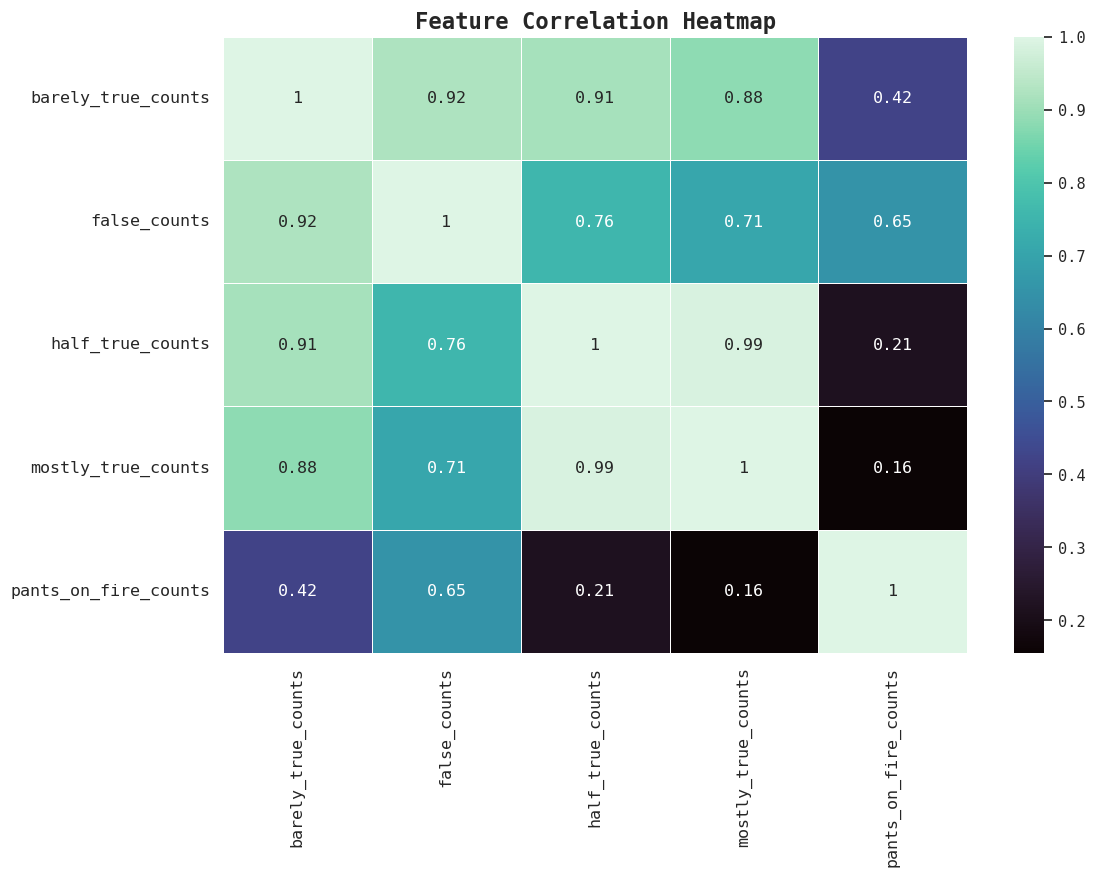

In [9]:
# Feature Correlation
plt.figure(figsize=(12, 8))
correlation_matrix = df[
    [
        "barely_true_counts",
        "false_counts",
        "half_true_counts",
        "mostly_true_counts",
        "pants_on_fire_counts",
    ]
].corr()
sns.heatmap(
    correlation_matrix, annot=True, cmap="mako", linewidths=0.5, linecolor="white"
)
plt.title("Feature Correlation Heatmap", fontsize=16, fontweight="bold")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

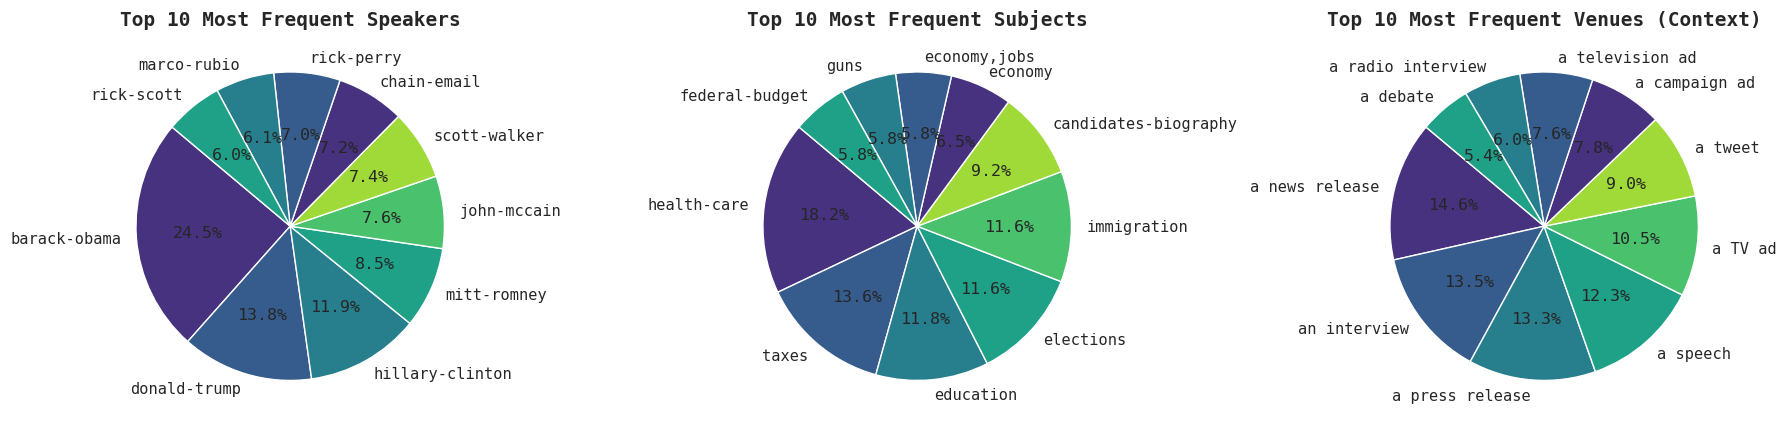

In [10]:
# Metadata Trends - Pie Charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Most Frequent Speakers
top_speakers = df["speaker"].value_counts().head(10)
axes[0].pie(
    top_speakers,
    labels=top_speakers.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=palette,
)
axes[0].set_title("Top 10 Most Frequent Speakers", fontsize=14, fontweight="bold")

# Most Frequent Subjects
top_subjects = df["subject"].value_counts().head(10)
axes[1].pie(
    top_subjects,
    labels=top_subjects.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=palette,
)
axes[1].set_title("Top 10 Most Frequent Subjects", fontsize=14, fontweight="bold")

# Most Frequent Venues (Context)
top_contexts = df["context"].value_counts().head(10)
axes[2].pie(
    top_contexts,
    labels=top_contexts.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=palette,
)
axes[2].set_title(
    "Top 10 Most Frequent Venues (Context)", fontsize=14, fontweight="bold"
)

plt.tight_layout()
plt.show()

---

## **Data Preprocessing**
In this section, we will preprocess the data to prepare it for model training. This includes handling missing values, cleaning and normalizing the text data, handling speaker names and subjects, implementing a text preprocessing pipeline, and applying TF-IDF vectorization for feature extraction.

### **Steps in Data Preprocessing**
1. **Handling Missing Values**: Address any missing values identified during EDA.
2. **Text Cleaning and Normalization**: Remove unwanted characters, convert text to lowercase, and handle punctuation.
3. **Tokenization**: Split the text into individual words or tokens.
4. **Stopword Removal**: Remove common words that do not contribute to the meaning of the text (e.g., "and", "the").
5. **Lemmatization**: Reduce words to their base or root form (e.g., "running" to "run").
6. **Handling Speaker Names**: Replace hyphens with spaces in speaker names.
7. **Handling Subjects**: Decide whether to split subjects into separate columns or lists.
8. **TF-IDF Vectorization**: Convert the text data into numerical features using Term Frequency-Inverse Document Frequency (TF-IDF).



---

In [11]:
categorical_cols = df.select_dtypes(include=["object"]).columns
categorical_cols = categorical_cols.drop(["label", "id"])
print("Categorical Columns:")
print(categorical_cols)
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns
print("\nNumerical Columns:")
print(numerical_cols)

Categorical Columns:
Index(['statement', 'subject', 'speaker', 'speaker_job', 'state_info',
       'party_affiliation', 'context', 'cleaned_statement'],
      dtype='object')

Numerical Columns:
Index(['barely_true_counts', 'false_counts', 'half_true_counts',
       'mostly_true_counts', 'pants_on_fire_counts'],
      dtype='object')


In [12]:
df.drop(columns=["id"], inplace=True)

In [13]:
# Replacing Missing Values in Catetgorical Columns with 'Unknown' to Preserve the Information
df[categorical_cols] = df[categorical_cols].fillna("Unknown")

# Replacing the Missing Values in Numerical Columns with '0' to Preserve the Information
df[numerical_cols] = df[numerical_cols].fillna(0)

# Verifying the Missing Values Have Been Replaced
print("\nMissing Values In Each Column After Imputation:")
print("-" * 50)
missing_values = df.isnull().sum().reset_index()
missing_values.columns = ["Column", "Missing Values"]
print(tabulate(missing_values, headers="keys", tablefmt="psql"))


Missing Values In Each Column After Imputation:
--------------------------------------------------
+----+----------------------+------------------+
|    | Column               |   Missing Values |
|----+----------------------+------------------|
|  0 | label                |                0 |
|  1 | statement            |                0 |
|  2 | subject              |                0 |
|  3 | speaker              |                0 |
|  4 | speaker_job          |                0 |
|  5 | state_info           |                0 |
|  6 | party_affiliation    |                0 |
|  7 | barely_true_counts   |                0 |
|  8 | false_counts         |                0 |
|  9 | half_true_counts     |                0 |
| 10 | mostly_true_counts   |                0 |
| 11 | pants_on_fire_counts |                0 |
| 12 | context              |                0 |
| 13 | cleaned_statement    |                0 |
+----+----------------------+------------------+


**Text Cleaning and Normalization**

In [14]:
# Text Cleaning and Normalization
def clean_text(text):
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = text.lower()
    return text


df["cleaned_statement"] = df["statement"].apply(clean_text)
df.drop(columns=["statement"], inplace=True)

# Display the first few rows of the cleaned data
print("First few rows of the cleaned data:")
print(tabulate(df.head(), headers="keys", tablefmt="psql"))

First few rows of the cleaned data:
+----+-------------+------------------------------------+----------------+----------------------+--------------+---------------------+----------------------+----------------+--------------------+----------------------+------------------------+---------------------+------------------------------------------------------------------------------------------------------------------------------------------+
|    | label       | subject                            | speaker        | speaker_job          | state_info   | party_affiliation   |   barely_true_counts |   false_counts |   half_true_counts |   mostly_true_counts |   pants_on_fire_counts | context             | cleaned_statement                                                                                                                        |
|----+-------------+------------------------------------+----------------+----------------------+--------------+---------------------+--------------------

In [15]:
# Tokenization
def tokenize_text(text):
    return nltk.word_tokenize(text)


df["cleaned_statement"] = df["cleaned_statement"].apply(tokenize_text)

# Display the first few rows of the tokenized data
print("First few rows of the tokenized data:")
print(tabulate(df.head(), headers="keys", tablefmt="psql"))

First few rows of the tokenized data:
+----+-------------+------------------------------------+----------------+----------------------+--------------+---------------------+----------------------+----------------+--------------------+----------------------+------------------------+---------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|    | label       | subject                            | speaker        | speaker_job          | state_info   | party_affiliation   |   barely_true_counts |   false_counts |   half_true_counts |   mostly_true_counts |   pants_on_fire_counts | context             | cleaned_statement                                                                                                                                                                                                 |
|----+

In [16]:
# Stopword Removal
stop_words = set(stopwords.words("english"))


def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]


df["cleaned_statement"] = df["cleaned_statement"].apply(remove_stopwords)

# Display the first few rows of the filtered data
print("First few rows of the filtered data:")
print(tabulate(df.head(), headers="keys", tablefmt="psql"))

First few rows of the filtered data:
+----+-------------+------------------------------------+----------------+----------------------+--------------+---------------------+----------------------+----------------+--------------------+----------------------+------------------------+---------------------+----------------------------------------------------------------------------------------------------------------------------------------------+
|    | label       | subject                            | speaker        | speaker_job          | state_info   | party_affiliation   |   barely_true_counts |   false_counts |   half_true_counts |   mostly_true_counts |   pants_on_fire_counts | context             | cleaned_statement                                                                                                                            |
|----+-------------+------------------------------------+----------------+----------------------+--------------+---------------------+-----------

In [17]:
# Lemmatization
lemmatizer = WordNetLemmatizer()


def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]


df["cleaned_statement"] = df["cleaned_statement"].apply(lemmatize_tokens)

# Display the first few rows of the lemmatized data
print("First few rows of the lemmatized data:")
print(tabulate(df.head(), headers="keys", tablefmt="psql"))

First few rows of the lemmatized data:
+----+-------------+------------------------------------+----------------+----------------------+--------------+---------------------+----------------------+----------------+--------------------+----------------------+------------------------+---------------------+---------------------------------------------------------------------------------------------------------------------------------------------+
|    | label       | subject                            | speaker        | speaker_job          | state_info   | party_affiliation   |   barely_true_counts |   false_counts |   half_true_counts |   mostly_true_counts |   pants_on_fire_counts | context             | cleaned_statement                                                                                                                           |
|----+-------------+------------------------------------+----------------+----------------------+--------------+---------------------+-----------

In [18]:
# Function to replace hyphens with spaces in speaker names
def clean_speaker_name(name):
    return name.replace("-", " ")


# Apply the function to the 'speaker' column
df["speaker"] = df["speaker"].apply(clean_speaker_name)

# Display the first few rows to verify the changes
print("First few rows after cleaning speaker names:")
print(tabulate(df[["speaker"]].head(), headers="keys", tablefmt="psql"))

First few rows after cleaning speaker names:
+----+----------------+
|    | speaker        |
|----+----------------|
|  0 | dwayne bohac   |
|  1 | scott surovell |
|  2 | barack obama   |
|  3 | blog posting   |
|  4 | charlie crist  |
+----+----------------+


In [19]:
# Handling Subjects
def split_subjects(subjects):
    return subjects.split(",")


df["subjects"] = df["subject"].apply(split_subjects)
df.drop(columns=["subject"], inplace=True)

In [20]:
# Flatten the 'subjects' column into individual binary columns
df_subjects = df["subjects"].apply(lambda x: pd.Series(1, index=x)).fillna(0)
df.drop(columns=["subjects"], inplace=True)
df = pd.concat([df, df_subjects], axis=1)

In [21]:
# Define the remaining categorical columns
categorical_cols = [
    "speaker",
    "speaker_job",
    "state_info",
    "party_affiliation",
    "context",
]

# Apply one-hot encoding to the remaining categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Convert labels to numeric values
label_mapping = {
    "pants-fire": 0,
    "false": 1,
    "barely-true": 2,
    "half-true": 3,
    "mostly-true": 4,
    "true": 5,
}
df_encoded["label"] = df_encoded["label"].map(label_mapping)

In [22]:
# TF-IDF Vectorization with limited features
tfidf_vectorizer = TfidfVectorizer(max_features=300)  # Limiting to 300 features
X_tfidf = tfidf_vectorizer.fit_transform(
    df_encoded["cleaned_statement"].apply(lambda x: " ".join(x))
)

# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(
    X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out()
)

# Display the shape of the TF-IDF DataFrame
print("Shape of TF-IDF DataFrame:", tfidf_df.shape)

Shape of TF-IDF DataFrame: (12791, 300)


In [25]:
# Define numerical columns
numerical_cols = [
    "barely_true_counts",
    "false_counts",
    "half_true_counts",
    "mostly_true_counts",
    "pants_on_fire_counts",
]

# Ensure all columns in X_categorical are numeric
X_categorical = df_encoded.drop(
    columns=numerical_cols + ["cleaned_statement", "label"]
).values.astype(np.float64)

# Convert numerical features to sparse matrix
X_numerical_sparse = csr_matrix(df_encoded[numerical_cols].values)

# Convert one-hot encoded categorical features to sparse matrix
X_categorical_sparse = csr_matrix(X_categorical)

# Combine TF-IDF features with numerical and one-hot encoded categorical features
X = hstack([X_tfidf, X_numerical_sparse, X_categorical_sparse])

# Prepare the target variable
y = df_encoded["label"]

# Display the shape of the final feature set
print("Shape of feature set:", X.shape)

Shape of feature set: (12791, 10366)


In [26]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select the top 300 features
selector = SelectKBest(f_classif, k=300)
X_selected = selector.fit_transform(X, y)

# Display the shape of the selected feature set
print("Shape of selected feature set:", X_selected.shape)

Shape of selected feature set: (12791, 300)


In [27]:
# Standardize the features
scaler = StandardScaler(with_mean=False)  # with_mean=False to work with sparse matrices
X_scaled = scaler.fit_transform(X_selected)

# Apply PCA to reduce the number of features
pca = PCA(n_components=100)  # Reduce to 100 components
X_pca = pca.fit_transform(X_scaled)

# Display the shape of the reduced feature set
print("Shape of reduced feature set:", X_pca.shape)

Shape of reduced feature set: (12791, 100)


In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid with reduced range
param_dist = {
    "n_estimators": [50, 100],  # Reduced range
    "max_depth": [None, 10, 20],  # Reduced range
    "min_samples_split": [2, 5],  # Reduced range
}

# Initialize the model
random_forest = RandomForestClassifier()

# Initialize Randomized Search with fewer iterations and CV folds
random_search = RandomizedSearchCV(
    random_forest,
    param_distributions=param_dist,
    n_iter=5,  # Reduced number of iterations
    cv=3,  # Reduced number of cross-validation folds
    scoring="accuracy",
    random_state=42,
)

# Train the model
start_time = time.time()
random_search.fit(X_train, y_train)
end_time = time.time()

# Get the best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

# Evaluate the model
y_pred_random_forest = random_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_random_forest)
precision = precision_score(y_test, y_pred_random_forest, average="weighted")
recall = recall_score(y_test, y_pred_random_forest, average="weighted")
f1 = f1_score(y_test, y_pred_random_forest, average="weighted")
training_time = end_time - start_time

# Display the results
results = [
    ["Random Forest Accuracy", accuracy],
    ["Random Forest Precision", precision],
    ["Random Forest Recall", recall],
    ["Random Forest F1 Score", f1],
    ["Random Forest Time", training_time],
    ["Best Parameters", best_params],
    ["Best CV Score", best_score],
]
print(tabulate(results, headers=["Metric", "Value"], tablefmt="psql"))

+-------------------------+----------------------------------------------------------------+
| Metric                  | Value                                                          |
|-------------------------+----------------------------------------------------------------|
| Random Forest Accuracy  | 0.26768268855021493                                            |
| Random Forest Precision | 0.2865318736677001                                             |
| Random Forest Recall    | 0.26768268855021493                                            |
| Random Forest F1 Score  | 0.25310880775182154                                            |
| Random Forest Time      | 76.49013423919678                                              |
| Best Parameters         | {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 10} |
| Best CV Score           | 0.26514791859927617                                            |
+-------------------------+-------------------------------------------

---

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack, csr_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# TF-IDF Vectorization with limited features
tfidf_vectorizer = TfidfVectorizer(max_features=300)  # Limiting to 300 features
X_tfidf = tfidf_vectorizer.fit_transform(
    df_encoded["cleaned_statement"].apply(lambda x: " ".join(x))
)

# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(
    X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out()
)

# Display the shape of the TF-IDF DataFrame
print("Shape of TF-IDF DataFrame:", tfidf_df.shape)

# Define numerical columns
numerical_cols = [
    "barely_true_counts",
    "false_counts",
    "half_true_counts",
    "mostly_true_counts",
    "pants_on_fire_counts",
]

# Ensure all columns in X_categorical are numeric
X_categorical = df_encoded.drop(
    columns=numerical_cols + ["cleaned_statement", "label"]
).values.astype(np.float64)

# Convert numerical features to sparse matrix
X_numerical_sparse = csr_matrix(df_encoded[numerical_cols].values)

# Convert one-hot encoded categorical features to sparse matrix
X_categorical_sparse = csr_matrix(X_categorical)

# Combine TF-IDF features with numerical and one-hot encoded categorical features
X = hstack([X_tfidf, X_numerical_sparse, X_categorical_sparse])

# Prepare the target variable
y = df_encoded["label"]

# Display the shape of the final feature set
print("Shape of feature set:", X.shape)

# Standardize the features
scaler = StandardScaler(with_mean=False)  # with_mean=False to work with sparse matrices
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce the number of features
pca = PCA(n_components=300)  # Fixed number of components
X_pca = pca.fit_transform(X_scaled)

# Display the shape of the reduced feature set
print("Shape of reduced feature set:", X_pca.shape)

Shape of TF-IDF DataFrame: (12791, 300)
Shape of feature set: (12791, 10366)
Shape of reduced feature set: (12791, 300)


In [32]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tabulate import tabulate
import time

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

In [33]:
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid with reduced range
param_dist = {
    "n_estimators": [50, 100],  # Reduced range
    "max_depth": [None, 10, 20],  # Reduced range
    "min_samples_split": [2, 5],  # Reduced range
}

# Initialize the model
random_forest = RandomForestClassifier()

# Initialize Randomized Search with fewer iterations and CV folds
random_search = RandomizedSearchCV(
    random_forest,
    param_distributions=param_dist,
    n_iter=5,  # Reduced number of iterations
    cv=3,  # Reduced number of cross-validation folds
    scoring="accuracy",
    random_state=42,
)

# Train the model
start_time = time.time()
random_search.fit(X_train, y_train)
end_time = time.time()

# Get the best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

# Evaluate the model
y_pred_random_forest = random_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_random_forest)
precision = precision_score(y_test, y_pred_random_forest, average="weighted")
recall = recall_score(y_test, y_pred_random_forest, average="weighted")
f1 = f1_score(y_test, y_pred_random_forest, average="weighted")
training_time = end_time - start_time

# Display the results
results = [
    ["Random Forest Accuracy", accuracy],
    ["Random Forest Precision", precision],
    ["Random Forest Recall", recall],
    ["Random Forest F1 Score", f1],
    ["Random Forest Time", training_time],
    ["Best Parameters", best_params],
    ["Best CV Score", best_score],
]
print(tabulate(results, headers=["Metric", "Value"], tablefmt="psql"))

+-------------------------+----------------------------------------------------------------+
| Metric                  | Value                                                          |
|-------------------------+----------------------------------------------------------------|
| Random Forest Accuracy  | 0.2567409144196952                                             |
| Random Forest Precision | 0.2692508262366623                                             |
| Random Forest Recall    | 0.2567409144196952                                             |
| Random Forest F1 Score  | 0.23794598928302343                                            |
| Random Forest Time      | 128.33379530906677                                             |
| Best Parameters         | {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 10} |
| Best CV Score           | 0.2408134455457632                                             |
+-------------------------+-------------------------------------------

In [27]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {"C": [0.1, 1, 10, 100], "solver": ["liblinear", "saga"]}

# Initialize the model
log_reg = LogisticRegression(max_iter=1000)

# Initialize Grid Search
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring="accuracy")

# Train the model
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Evaluate the model
y_pred_log_reg = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_log_reg)
precision = precision_score(y_test, y_pred_log_reg, average="weighted")
recall = recall_score(y_test, y_pred_log_reg, average="weighted")
f1 = f1_score(y_test, y_pred_log_reg, average="weighted")
training_time = end_time - start_time

# Display the results
results = [
    ["Logistic Regression Accuracy", accuracy],
    ["Logistic Regression Precision", precision],
    ["Logistic Regression Recall", recall],
    ["Logistic Regression F1 Score", f1],
    ["Logistic Regression Time", training_time],
    ["Best Parameters", best_params],
    ["Best CV Score", best_score],
]
print(tabulate(results, headers=["Metric", "Value"], tablefmt="psql"))

+-------------------------------+----------+
| Metric                        |    Value |
|-------------------------------+----------|
| Logistic Regression Accuracy  | 0.258304 |
| Logistic Regression Precision | 0.255747 |
| Logistic Regression Recall    | 0.258304 |
| Logistic Regression F1 Score  | 0.253001 |
| Logistic Regression Time      | 0.752467 |
+-------------------------------+----------+


In [28]:
from sklearn.svm import SVC

# Initialize the model
svm = SVC()

# Train the model
start_time = time.time()
svm.fit(X_train, y_train)
end_time = time.time()

# Evaluate the model
y_pred_svm = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm, average="weighted")
recall = recall_score(y_test, y_pred_svm, average="weighted")
f1 = f1_score(y_test, y_pred_svm, average="weighted")
training_time = end_time - start_time

# Display the results
results = [
    ["SVM Accuracy", accuracy],
    ["SVM Precision", precision],
    ["SVM Recall", recall],
    ["SVM F1 Score", f1],
    ["SVM Time", training_time],
]
print(tabulate(results, headers=["Metric", "Value"], tablefmt="psql"))

+---------------+-----------+
| Metric        |     Value |
|---------------+-----------|
| SVM Accuracy  |  0.273935 |
| SVM Precision |  0.287587 |
| SVM Recall    |  0.273935 |
| SVM F1 Score  |  0.258299 |
| SVM Time      | 18.4421   |
+---------------+-----------+
